# **Data Acquisition**

Data Acquisition can happen in variety of ways such as:

1. **Downloading Files**.
2. **Fetching API Data**.
3. **Scrapping Web Page**.
4. **Pulling Data from Database**.

The data can be gathered from one or any combination of the above sources.

## **CSV**

A CSV file is a text file, which is similar to a spreadsheet in terms of its tabular structure. But it cannot contain any if statement or function in it as it holds only the raw data unlike a spreadsheet like XLSX files, the format used by Microsoft Excel.

The first line of the file is going to be the header by default.The second line will start as the data belonging to the features of the first line. Within each row, the cells(values) are seperated by commas.

### **Reading CSV Files**
Let's read csv files with this toy dataset on student scores. `read_csv()` is used to load data from csv files into a Pandas dataframe. We just need to specify the filepath of our data. I stored `student_scores.csv` in the same directory as this Jupyter notebook, so we just need to provide the name of the file.

In [6]:
import pandas as pd

df = pd.read_csv('data/student_scores.csv')

`head()` is a useful function you can call on your dataframe to display the first few rows. Let's use it to see what this data looks like.

In [7]:
df.head()

,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


**Fun Fact:**

Remember, CSV stands for comma separated values - but they can actually be separated by different characters, tabs, white space, etc. If your file is separated by a colon, let's say, you can still use `read_csv()` with the `sep` parameter.

In [8]:
df = pd.read_csv('data/student_scores.csv', sep=':') # bad logic
df.head()

,"ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final"
0,"27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0"
1,"30572,Alex,1.0,0.84,92.0,89.0,94.0,92.0,91.0"
2,"39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0"
3,"28592,Kris,0.96,1.0,82.0,94.0,90.0,81.0,84.0"
4,"27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0"


This obviously didn't work because there our CSV file is separated by commas. Because there are no colons, nothing was separated and everything was read into one column!

### **Headers**
Another thing you can do with `read_csv` is specify which line of the file is the header, which specifies the column labels. It's usually the first line, but sometimes we'll want to specify a later line if there is extra meta information at the top of the file. We can do that like this.

In [9]:
df = pd.read_csv('data/student_scores.csv', header=2)
df.head()

,30572,Alex,1.0,0.84,92.0,89.0,94.0,92.0.1,91.0
0,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
1,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
2,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


Here, row 2 was used as the the header and everything above that was cut off. By default, `read_csv` uses header=0, which uses the first line for column labels.

If columns labels are not included in your file, you can use `header=None` to prevent your first line of data from being misinterpreted as column labels.

In [9]:
df = pd.read_csv('data/student_scores.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final
1,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
2,30572,Alex,1.0,0.84,92.0,89.0,94.0,92.0,91.0
3,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
4,28592,Kris,0.96,1.0,82.0,94.0,90.0,81.0,84.0


You can also specify your own column labels like this.

In [14]:
labels = ['id', 'name', 'attendance', 'hw', 'test1', 'project1', 'test2', 'project2','final']
df = pd.read_csv('data/student_scores.csv', names=labels)
df.head()

,id,name,attendance,hw,test1,project1,test2,project2,final
0,ID,Name,Attendance,HW,Test1,Project1,Test2,Project2,Final
1,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
2,30572,Alex,1.0,0.84,92.0,89.0,94.0,92.0,91.0
3,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
4,28592,Kris,0.96,1.0,82.0,94.0,90.0,81.0,84.0


If you want to tell pandas that there was a header line that you are replacing, you can specify the row of that line like this.

In [16]:
labels = ['id', 'name', 'attendance', 'hw', 'test1', 'project1', 'test2', 'project2', 'final']
df = pd.read_csv('data/student_scores.csv', header=0, names=labels)
df.head()

,id,name,attendance,hw,test1,project1,test2,project2,final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


### **Index**
Instead of using the default index (integers incrementing by 1 from 0), you can specify one or more of your columns to be the index of your dataframe.

In [17]:
df.head()

,id,name,attendance,hw,test1,project1,test2,project2,final
0,27604,Joe,0.96,0.97,87.0,98.0,92.0,93.0,95.0
1,30572,Alex,1.00,0.84,92.0,89.0,94.0,92.0,91.0
2,39203,Avery,0.84,0.74,68.0,70.0,84.0,90.0,82.0
3,28592,Kris,0.96,1.00,82.0,94.0,90.0,81.0,84.0
4,27492,Rick,0.32,0.85,98.0,100.0,73.0,82.0,88.0


In [17]:
df = pd.read_csv('data/student_scores.csv', index_col='Name') # name col becomes index
df.head() 

,ID,Attendance,HW,Test1,Project1,Test2,Project2,Final
Name,,,,,,,,
Joe,27604,0.96,0.97,87.0,98.0,92.0,93.0,95.0
Alex,30572,1.00,0.84,92.0,89.0,94.0,92.0,91.0
Avery,39203,0.84,0.74,68.0,70.0,84.0,90.0,82.0
Kris,28592,0.96,1.00,82.0,94.0,90.0,81.0,84.0
Rick,27492,0.32,0.85,98.0,100.0,73.0,82.0,88.0


In [20]:
df = pd.read_csv('data/student_scores.csv', index_col=['Name', 'ID']) # multiple indices
df.head()

,,Attendance,HW,Test1,Project1,Test2,Project2,Final
Name,ID,,,,,,,
Joe,27604,0.96,0.97,87.0,98.0,92.0,93.0,95.0
Alex,30572,1.00,0.84,92.0,89.0,94.0,92.0,91.0
Avery,39203,0.84,0.74,68.0,70.0,84.0,90.0,82.0
Kris,28592,0.96,1.00,82.0,94.0,90.0,81.0,84.0
Rick,27492,0.32,0.85,98.0,100.0,73.0,82.0,88.0


There are many other things you can do with this function alone, such as parsing dates, filling null values, skipping rows, etc. A lot of these can be done in different steps after `read_csv()`. We're going to modify our data in other ways, but you can always look up how to do some steps with this function [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

### **Challenge #1**
Use `read_csv()` to read in `cancer_data.csv` and use an appropriate column as the index. Then, use `.head()` on your dataframe to see if you've done this correctly. *Hint: First call `read_csv()` **without parameters** and then `head()` to see what the data looks like.*

In [ ]:
df_cancer=

### **Use Case:**
Use `read_csv()` to read in `powerplant_data.csv` with more descriptive column names based on the description of features on this [website](http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant). Then, use `.head()` on your dataframe to see if you've done this correctly. *Hint: Like in the previous quiz, first call `read_csv()` without parameters and then `head()` to see what the data looks like.*

In [18]:
df_powerplant = pd.read_csv('data/powerplant_data.csv')

In [19]:
df_powerplant.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [20]:
df_powerplant = pd.read_csv('data/powerplant_data.csv',header=0, names=['hourly average ambient variables Temperature (AT)','Exhaust Vacuum (V)', 'Ambient Pressure (AP)','Relative Humidity (RH)','net hourly electrical energy output of the plant (PE)' ])

In [21]:
df_powerplant.head() 

,hourly average ambient variables Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),net hourly electrical energy output of the plant (PE)
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### **Writing CSV Files** 
Awesome! Now, we'll save your second dataframe with power plant data into a csv file for the next section.

In [22]:
df_powerplant.to_csv('data/powerplant_data_edited.csv')

Let's see if that worked the way we wanted.

In [23]:
df = pd.read_csv('data/powerplant_data_edited.csv')
df.head()

,Unnamed: 0,hourly average ambient variables Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),net hourly electrical energy output of the plant (PE)
0,0,8.34,40.77,1010.84,90.01,480.48
1,1,23.64,58.49,1011.40,74.20,445.75
2,2,29.74,56.90,1007.15,41.91,438.76
3,3,19.07,49.69,1007.22,76.79,453.09
4,4,11.80,40.66,1017.13,97.20,464.43


What's this `Unnamed:0`? `to_csv()` will store our index unless we tell it not to. To make it ignore the index, we have to provide the parameter `index=False`

In [24]:
df_powerplant.to_csv('data/powerplant_data_edited.csv', index=False)

In [25]:
df = pd.read_csv('data/powerplant_data_edited.csv')
df.head()

,hourly average ambient variables Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),net hourly electrical energy output of the plant (PE)
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# **Data Assesment**
Once you have your data loaded into dataframes, Pandas makes a quick investigation of the data really easy. Let's explore some helpful methods for assessing and understanding about a dataset. We can use the cancer data from before to help us.

### **Loading Dataset**

In [38]:
import pandas as pd

df = pd.read_csv('data/cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,NaN,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,NaN,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **No. of dimensions**

In [39]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(569, 32)

### **Column Datatypes**

In [40]:
# this returns the datatypes of the columns
df.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_SE                 float64
texture_SE                float64
perimeter_SE              float64
area_SE                   float64
smoothness_SE             float64
compactness_SE            float64
concavity_SE              float64
concave_points_SE         float64
symmetry_SE               float64
fractal_dimension_SE      float64
radius_max                float64
texture_max               float64
perimeter_max             float64
area_max                  float64
smoothness_max            float64
compactness_max           float64
concavity_max             float64
concave_points

In [41]:
# although the datatype for diagnosis appears to be object, further
# investigation shows it's a string
type(df['diagnosis'][0])

str

Pandas actually stores [pointers](https://en.wikipedia.org/wiki/Pointer_(computer_programming)) to strings in dataframes and series, which is why `object` instead of `str` appears as the datatype. Understanding this is not essential for data analysis - just know that strings will appear as objects in Pandas.

### **Concise Summary**

In [42]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_SE               569 non-null    float64
 13  texture_SE              548 non-null    float64
 14  perimeter_SE            569 non-null    fl

### **No. of Unique Values**

In [43]:
# this returns the number of unique values in each column
df.nunique()

id                        562
diagnosis                   2
radius_mean               451
texture_mean              459
perimeter_mean            516
area_mean                 532
smoothness_mean           434
compactness_mean          530
concavity_mean            530
concave_points_mean       536
symmetry_mean             394
fractal_dimension_mean    494
radius_SE                 535
texture_SE                499
perimeter_SE              526
area_SE                   523
smoothness_SE             495
compactness_SE            534
concavity_SE              526
concave_points_SE         500
symmetry_SE               438
fractal_dimension_SE      539
radius_max                452
texture_max               490
perimeter_max             510
area_max                  537
smoothness_max            378
compactness_max           523
concavity_max             532
concave_points_max        485
symmetry_max              449
fractal_dimension_max     530
dtype: int64

### **Data Statistics**

In [44]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,0.062833,0.405681,1.223139,2.869702,40.351402,0.006978,0.025564,0.031898,0.011792,0.020763,0.003808,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,0.007051,0.277166,0.563352,2.018757,45.484173,0.002943,0.017911,0.030131,0.006161,0.008539,0.002644,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,0.057800,0.232400,0.839850,1.614000,17.860000,0.005212,0.013080,0.015100,0.007711,0.015195,0.002256,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,0.061540,0.326500,1.108000,2.302000,24.620000,0.006351,0.020480,0.026020,0.011030,0.018780,0.003204,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,0.066150,0.476800,1.474250,3.330000,44.960000,0.008064,0.032470,0.042320,0.014710,0.023643,0.004558,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### **Fist Five Records**

In [45]:
# this returns the first few lines in our dataframe
# by default, it returns the first five
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,NaN,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,NaN,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **First 20 Records**

In [46]:
# although, you can specify however many rows you'd like returned
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,NaN,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,NaN,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,NaN,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,NaN,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,NaN,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


### **Last 2 Lines**

In [47]:
# same thing applies to `.tail()` which returns the last few rows
df.tail(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


## **Indexing and Slicing Data**
Let's separate this dataframe into three new dataframes - one for each metric (mean, standard error, and maximum). To get the data for each dataframe, we need to select the `id` and `diagnosis` columns, as well as the ten columns for that metric.

In [49]:
# View the index number and label for each column
for i, v in enumerate(df.columns): # enumerate iterates like for loop however returns index and values
    print(i, v)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave_points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_SE
13 texture_SE
14 perimeter_SE
15 area_SE
16 smoothness_SE
17 compactness_SE
18 concavity_SE
19 concave_points_SE
20 symmetry_SE
21 fractal_dimension_SE
22 radius_max
23 texture_max
24 perimeter_max
25 area_max
26 smoothness_max
27 compactness_max
28 concavity_max
29 concave_points_max
30 symmetry_max
31 fractal_dimension_max


We can select data using `loc` and `iloc`, which you can read more about [here](https://pandas.pydata.org/pandas-docs/stable/indexing.html). `loc` uses labels of rows or columns to select data, while `iloc` uses the index numbers. We'll use these to index the dataframe below.

In [50]:
# select all the columns from 'id' to the last mean column
df_means = df.loc[:,'id':'fractal_dimension_mean']
df_means.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [51]:
# repeat the step above using index numbers
df_means = df.iloc[:,:12]
df_means.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Let's save the dataframe of means for use in a future notebook.

In [54]:
df_means.to_csv('data/cancer_data_means.csv', index=False)

## **Selecting Multiple Ranges in Pandas**
Selecting the columns for the mean dataframe was pretty straightforward - the columns we needed to select were all together (`id`, `diagnosis`, and the mean columns). Now we run into a little issue when we try to do the same for the standard errors or maximum values. `id` and `diagnosis` are separated from the rest of the columns we need! We can't specify all of these in one range.

First, try creating the standard error dataframe on your own to see why doing this with just `loc` and `iloc` is an issue. Then, use this [stackoverflow link](https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe) to learn how to select multiple ranges in Pandas and try it below. By the way, to figure this out myself, I just found this link by googling "how to select multiple ranges df.iloc"

*Hint: You may have to import a new package!*

In [60]:
# import
import numpy as np

In [64]:
# create the standard errors dataframe
df_SE=df.iloc[:, np.r_[0:2, 12:22]]

In [65]:
# view the first few rows to confirm this was successful
df_SE.head()

,id,diagnosis,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE
0,842302,M,1.0950,NaN,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,842517,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,84300903,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,84348301,M,0.4956,1.1560,3.445,27.23,NaN,0.07458,0.05661,0.01867,0.05963,0.009208
4,84358402,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [66]:
# Let's save the dataframe of standart deviations for use in a future notebook.
df_SE.to_csv('data/cancer_data_SE.csv', index=False)

## **Homework**

Using the functions you learned so far, explore census_income_data.csv in the Jupyter notebook below to answer quiz questions below the notebook about these characteristics of the dataset:

- number of rows
- number of columns
- data types of several columns
- columns with missing values
- number of unique values of education
- mean age
- 75th percentile of hours-per-week

This data was originally taken from [here](https://archive.ics.uci.edu/ml/datasets/Census+Income).

# **Data Cleaning**

In [22]:
# import pandas and load cancer data
import pandas as pd

df = pd.read_csv('data/cancer_data_means.csv')

In [23]:
# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [24]:
# use means to fill in missing values
df.fillna(df.mean(), inplace=True)

# confirm your correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [25]:
# check for duplicates in the data
sum(df.duplicated())

5

In [26]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [27]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

## Renaming Columns
Since we also previously changed our dataset to only include means of tumor features, the "_mean" at the end of each feature seems unnecessary. It just takes extra time to type in our analysis later. Let's come up with a list of new labels to assign to our columns.

In [28]:
# remove "_mean" from column names
new_labels = []
for col in df.columns:
    if '_mean' in col:
        new_labels.append(col[:-5])  # exclude last 6 characters
    else:
        new_labels.append(col)

# new labels for our columns
new_labels

['id',
 'diagnosis',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry',
 'fractal_dimension']

In [29]:
# assign new labels to columns in dataframe
df.columns = new_labels

# display first few rows of dataframe to confirm changes
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


In [30]:
# save this for later
df.to_csv('data/cancer_data_edited.csv', index=False)

# EDA

In [6]:
!pip install pandas matplotlib

In [8]:
import pandas as pd
%matplotlib inline

df_census = pd.read_csv('data/census_income_data.csv')

In [9]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Histogram

For all numerical column in the dataset

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

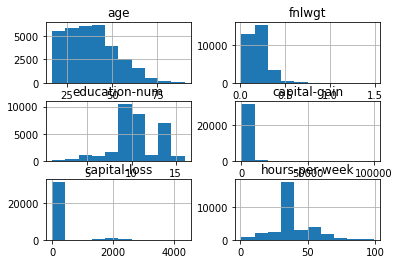

In [10]:
df_census.hist() # too much crowded

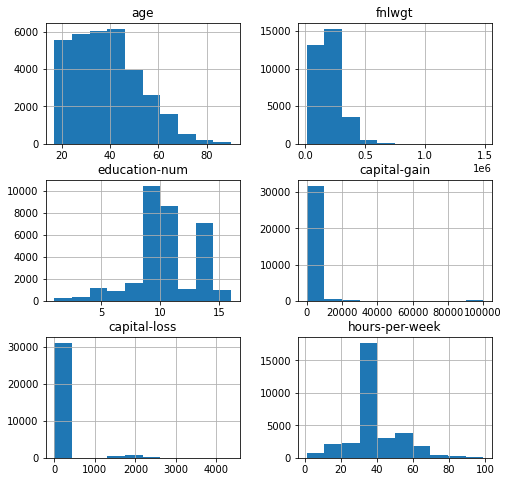

In [11]:
df_census.hist(figsize=(8,8)); # ; will supress the textual details

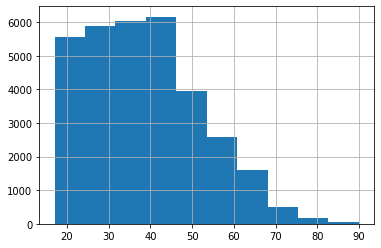

In [13]:
# drawing histogram for one specific column
df_census['age'].hist();

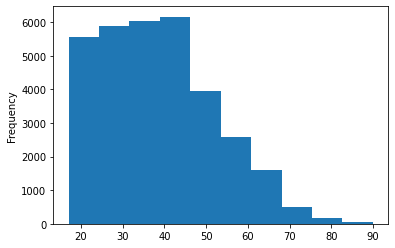

In [16]:
df_census['age'].plot(kind='hist', grid=False); # to have grid use grid=True

### Bar Chart

In [17]:
# First, let's have counts for each distint value or bar
df_census['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

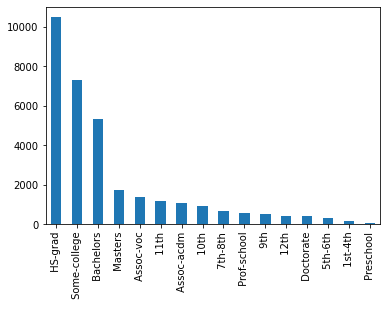

In [18]:
# Second, let's create a bar chart using plot
df_census['education'].value_counts().plot(kind='bar');

### PIE Chart

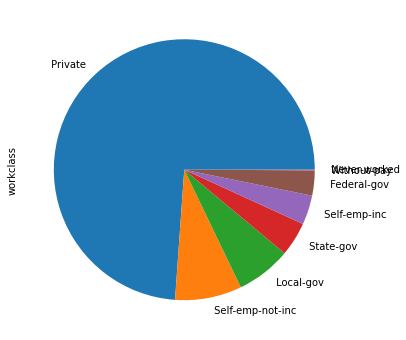

In [20]:
df_census['workclass'].value_counts().plot(kind='pie', figsize=(6,6));

### Scatter Plots

In [31]:
df_cancer = pd.read_csv('data/cancer_data_edited.csv')

In [32]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 564 non-null    int64  
 1   diagnosis          564 non-null    object 
 2   radius             564 non-null    float64
 3   texture            564 non-null    float64
 4   perimeter          564 non-null    float64
 5   area               564 non-null    float64
 6   smoothness         564 non-null    float64
 7   compactness        564 non-null    float64
 8   concavity          564 non-null    float64
 9   concave_points     564 non-null    float64
 10  symmetry           564 non-null    float64
 11  fractal_dimension  564 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.0+ KB


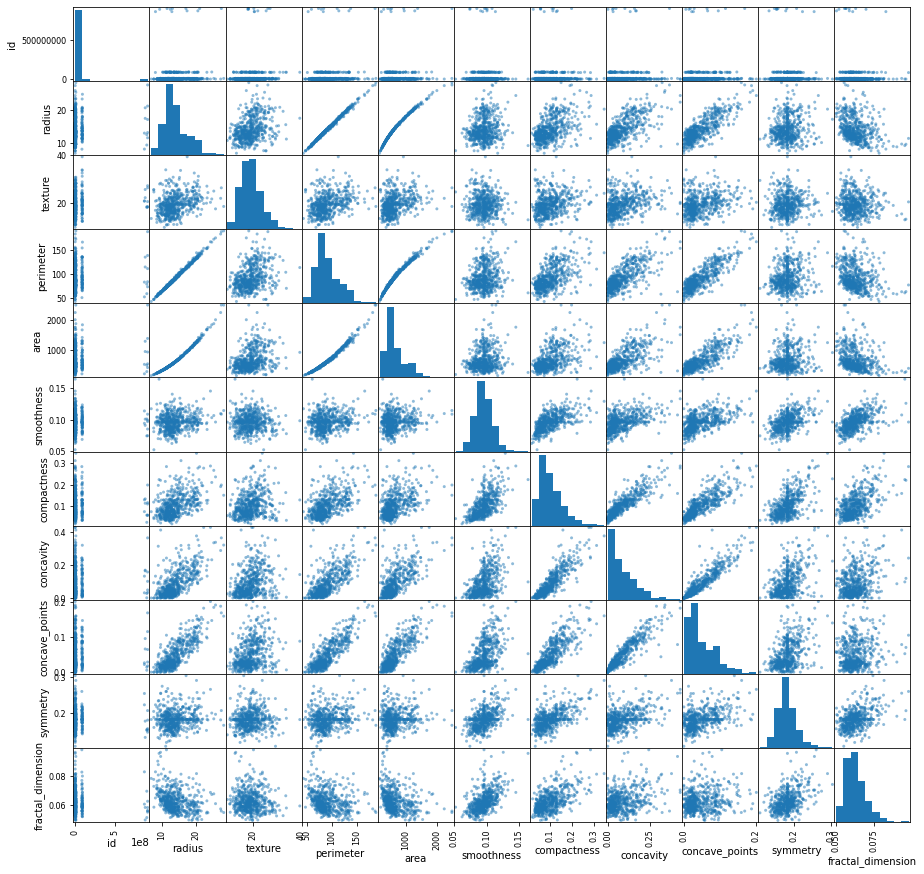

In [33]:
# Use: Insights into the relationships among numerical values
pd.plotting.scatter_matrix(df_cancer, figsize=(15,15));

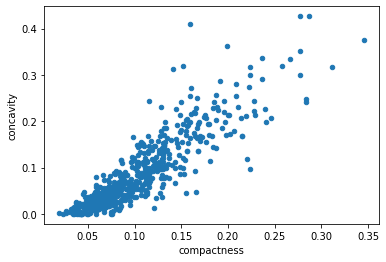

In [34]:
# single scatter plot
df_cancer.plot(kind='scatter', x='compactness', y='concavity');

### Box Plot

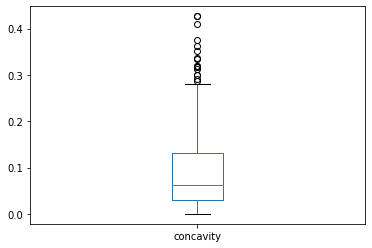

In [35]:
df_cancer['concavity'].plot(kind='box');

# Challenge
Use the space below to explore `powerplant_data_edited.csv` to answer the challenge questions below.

In [30]:
# import and load data


In [31]:
# plot relationship between temperature and electrical output


In [32]:
# plot distribution of humidity


In [33]:
# plot box plots for each variable


# Drawing Conclusions
Question - does the size of a tumor affect its malignancy? We can use descriptive statistics and visualizations to help us.

In [36]:
import pandas as pd

df = pd.read_csv('data/cancer_data_edited.csv')
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


# Selecting Data with Masks
In order to do this analysis, we'd ideally compare sizes of tumors that are benign and malignant. We can use __masks__ to select all rows in the dataframe that were diagnosed as malignant.

In [37]:
# Create new dataframe with only malignant tumors
df_m = df[df['diagnosis'] == 'M'] # take all the M rows and append them in df_m
df_m.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


Let's break down how we got `df_m`.

`df['diagnosis'] == 'M'` returns a Pandas Series of booleans indicating whether the value in the `diagnosis` columns is equal to `M`.

In [41]:
mask = df['diagnosis'] == 'M'
print(mask)

0       True
1       True
2       True
3       True
4       True
       ...  
559     True
560     True
561     True
562     True
563    False
Name: diagnosis, Length: 564, dtype: bool


And indexing the dataframe with this mask will return all rows where the value in `mask` is True (ie. where `diagnosis == 'M'`).

In [42]:
df_m = df[mask]
df_m

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
558,926125,M,20.92,25.090000,143.00,1347.0,0.109900,0.22360,0.31740,0.14740,0.2149,0.06879
559,926424,M,21.56,22.390000,142.00,1479.0,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623
560,926682,M,20.13,28.250000,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533
561,926954,M,16.60,28.080000,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648


Now that we have all the malignant tumors together in a dataframe, let's see summary statistics about the `area` feature, which offers a good metric for size.

In [38]:
# Display summary statistics for area of malignant tumors
df_m['area'].describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area, dtype: float64

Let's do the same for all the benign tumors.

In [39]:
# Create new dataframe with only benign tumors
df_b = df[df['diagnosis'] == 'B']

# Display summary statistics for area of benign tumors
df_b['area'].describe()

count    354.000000
mean     462.712429
std      134.769158
min      143.500000
25%      374.975000
50%      458.150000
75%      551.550000
max      992.100000
Name: area, dtype: float64

In [42]:
print('The mean area of malignant tumors is {0:.4f} while that of benign \
tumors is {1:.4f}.'.format(df_m['area'].mean(), df_b['area'].mean()))

The mean area of malignant tumors is 976.5829 while that of benign tumors is 462.7124.


Although summary statistics like the mean are helpful, it would be nice to be able to compare the distributions of the areas of malignant and benign tumors visually. Let's see a simple example of using matplotlib to create histograms for both distributions on the same plot.

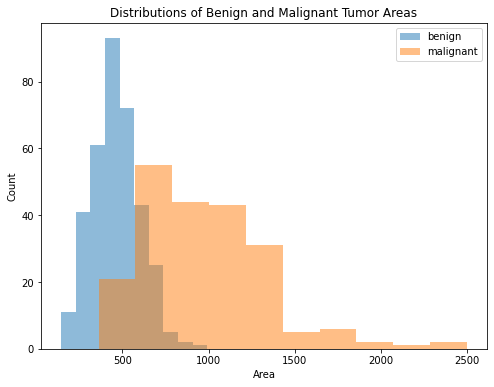

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot histogram of benign and malignant tumor areas on the same axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area'], alpha=0.5, label='benign')
ax.hist(df_m['area'], alpha=0.5, label='malignant')
ax.set_title('Distributions of Benign and Malignant Tumor Areas')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

The visual above suggests that there is a difference between the distribution of areas for benign and malignant tumors. We don't yet have the tools to conclude that these distributions are different or whether the size definitely affects a tumor's malignancy. However, we can observe from summary statistics and these histograms that malignant tumors are generally larger in size than benign tumors.

# Challenge
Use the space below to explore `store_data.csv` to answer the challenge questions below.

In [49]:
# imports and load data


In [50]:
# explore data


In [51]:
# total sales for the last month


In [52]:
# average sales


In [53]:
# sales on march 13, 2016


In [54]:
# worst week for store C


In [55]:
# total sales during most recent 3 month period


# Communicating Results
Let's see how we can communicate findings with visualizations with the census income data.

In [1]:
import pandas as pd
%matplotlib inline

df_census = pd.read_csv('data/census_income_data.csv')

Let's create two dataframes to separate people who make above and below 50K.

In [2]:
df_a = df_census[df_census['income'] == ' >50K']
df_b = df_census[df_census['income'] == ' <=50K']

We can use bar graphs to compare the education levels reached in both groups.

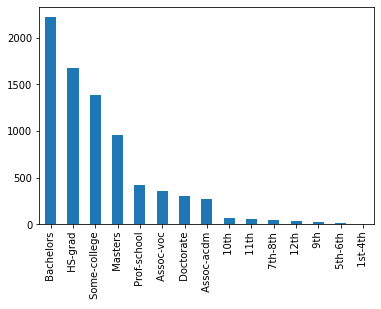

In [3]:
df_a['education'].value_counts().plot(kind='bar');

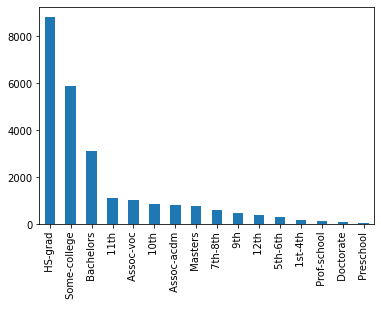

In [4]:
df_b['education'].value_counts().plot(kind='bar');

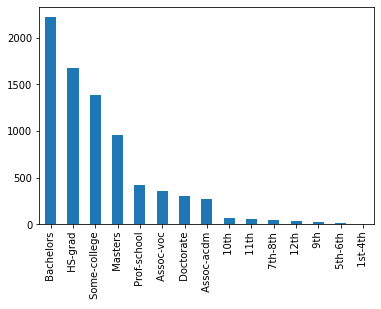

In [59]:
ind = df_a['education'].value_counts().index
df_a['education'].value_counts()[ind].plot(kind='bar');

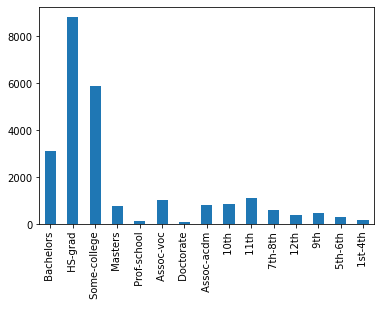

In [60]:
df_b['education'].value_counts()[ind].plot(kind='bar');

Notice the same index was used to keep the labels of the bar charts in the same order. Next, let's plot pie charts to compare what workclasses dominate in each group.

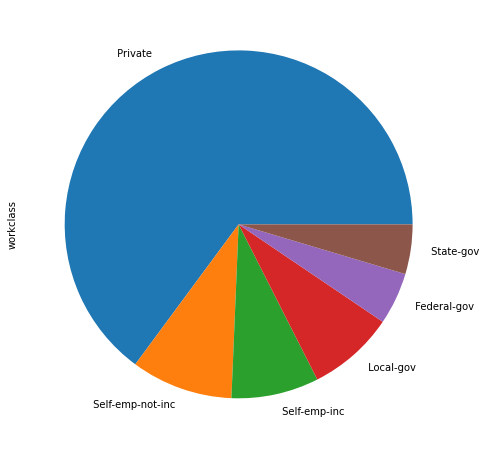

In [5]:
ind = df_a['workclass'].value_counts().index
df_a['workclass'].value_counts()[ind].plot(kind='pie', figsize=(8, 8));

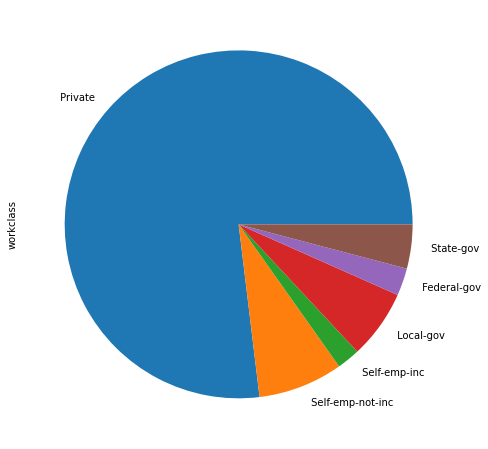

In [6]:
df_b['workclass'].value_counts()[ind].plot(kind='pie', figsize=(8, 8));

Next, let's use histograms to plot the distribution of ages for each group.

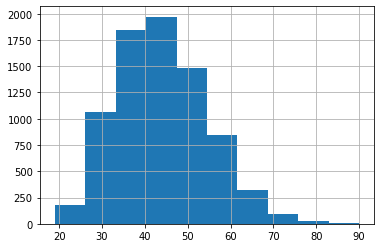

In [7]:
df_a['age'].hist();

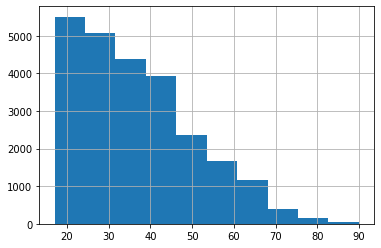

In [8]:
df_b['age'].hist();

In [9]:
df_a['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [10]:
df_b['age'].describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

# Challenge

In [68]:
# imports and load data


In [69]:
# explore data


In [70]:
# sales for the last month


In [71]:
# average sales


In [72]:
# sales for the week of March 13th, 2016


In [73]:
# sales for the latest 3-month periods
